# Heart Attack Prediction

## Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import pandera as pa
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline
from sklearn.svm import LinearSVC
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## Load Dataset 

In [3]:
Df = pd.read_csv("Classification.csv")
Df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Copy Dataset

In [4]:
Df.copy()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Perform Data Validation Checks (all that are necessary e.g null check etc)

In [5]:
Df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
Df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Explore Data (all that are necessary to explore data e.g shape etc)

In [7]:
Df.shape

(303, 14)

## Data Visualization

## Effect of each column on output (create atleast 7-10 beautiful but different graphs that gives good insights about data)

<AxesSubplot:xlabel='age', ylabel='output'>

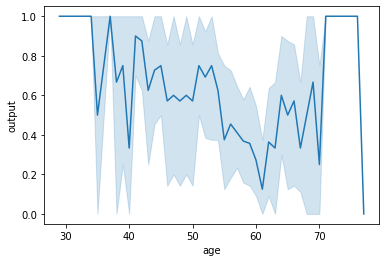

In [8]:
sns.lineplot(x = Df["age"], y = Df["output"])

<AxesSubplot:xlabel='output', ylabel='exng'>

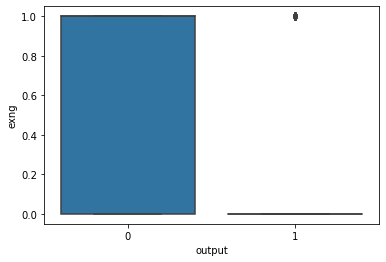

In [9]:
#Create box plot for output and exng.
sns.boxplot(x = "output", y = "exng", data = Df)
#plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

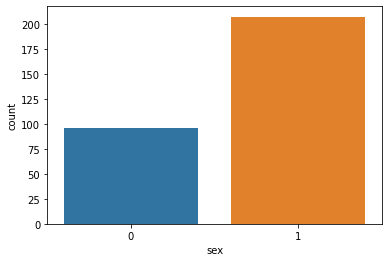

In [10]:
#Find the Count of sex on the basis of 0 for Female and 1 for male.
sns.countplot(x = Df['sex'])

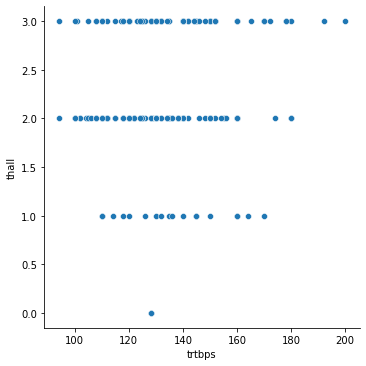

In [11]:
#Create relplot for trtbps and thall
sns.relplot(x = Df["trtbps"], y= Df["thall"]);

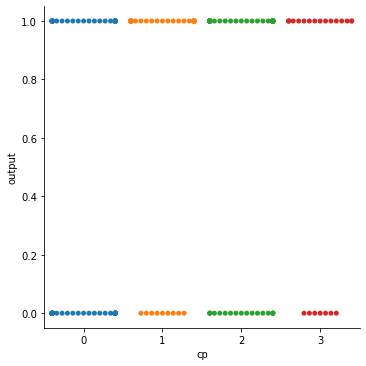

In [12]:
#Create catplot for output and swarm
sns.catplot(x="cp", y="output", kind="swarm", data=Df);

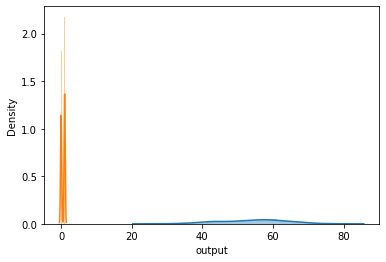

In [13]:
sns.distplot(Df['age']);
sns.distplot(Df['output']);

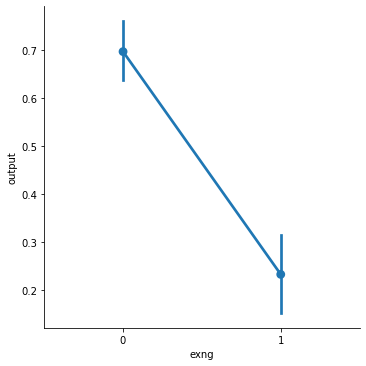

In [14]:
plot = sns.catplot(x='exng',y='output',kind='point',data=Df)
#plot.fig.autofmt_xdate()

## Check Co-relation with heatmap

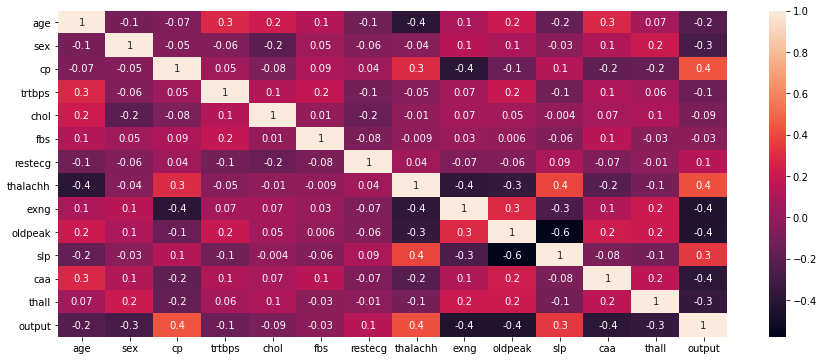

In [15]:
#sns.set_context('notebook')                           
plt.figure(figsize=(15,6))                            
cor = Df.corr()
sns.heatmap(cor, annot=True, fmt='.1g');

## Create Dependent & Independent Variable

In [16]:
X = Df.drop('output', axis=1)
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y=Df['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

## Split into Training & Testing (75% training)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227, 13) (227,)
(76, 13) (76,)


## Scale Data

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.9216772 , -1.45244244,  0.02550261, ...,  0.98707497,
        -0.72044846, -0.56385146],
       [ 1.25204461,  0.68849544, -0.93934605, ...,  0.98707497,
         0.27071397, -0.56385146],
       [ 0.2738698 ,  0.68849544, -0.93934605, ..., -0.63659183,
         0.27071397,  1.165801  ],
       ...,
       [-1.03036329,  0.68849544, -0.93934605, ..., -0.63659183,
         2.25303882,  1.165801  ],
       [ 1.3607307 , -1.45244244, -0.93934605, ...,  0.98707497,
         1.2618764 , -0.56385146],
       [-1.35642156,  0.68849544,  0.02550261, ...,  0.98707497,
        -0.72044846, -0.56385146]])

In [20]:
X_test = scaler.transform(X_test)
X_test

array([[-0.26956066,  0.68849544, -0.93934605, -0.19350903, -0.824853  ,
         2.42462118,  0.88384488,  0.28082013,  1.39572632, -0.04419294,
        -0.63659183, -0.72044846, -4.02315638],
       [-1.03036329,  0.68849544,  0.02550261, -0.19350903,  1.0965214 ,
        -0.41243556, -0.9912279 ,  0.87618127, -0.71647284, -0.91652315,
         0.98707497, -0.72044846, -0.56385146],
       [-0.37824675, -1.45244244,  0.99035127,  0.48489329,  1.0965214 ,
        -0.41243556, -0.9912279 , -0.31454102, -0.71647284,  0.39197217,
         0.98707497,  0.27071397, -0.56385146],
       [-1.57379374,  0.68849544, -0.93934605, -1.21111252, -1.50841889,
        -0.41243556, -0.9912279 , -1.50526332,  1.39572632,  0.82813727,
        -0.63659183, -0.72044846,  1.165801  ],
       [-2.22591028,  0.68849544,  1.95519993, -0.7588443 , -1.23129758,
        -0.41243556, -0.9912279 ,  1.04628446, -0.71647284, -0.91652315,
         0.98707497, -0.72044846, -0.56385146],
       [ 1.46941679, -1.452442

## Train at least 4 different machine learning models,show their accuracy & create their confusion matrix if it is a binary classification Also make ROC Curve for each model. Use as many cells as needed below. 

In [21]:
#Decision Tree Classifier.
dt_clf=DecisionTreeClassifier(random_state=25)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [22]:
dt_pred = dt_clf.predict(X_test)

In [23]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
Decision_Tree_Accuracy = round(accuracy_score(y_test, dt_pred)*100)
Decision_Tree_Accuracy

[[23  9]
 [10 34]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        32
           1       0.79      0.77      0.78        44

    accuracy                           0.75        76
   macro avg       0.74      0.75      0.74        76
weighted avg       0.75      0.75      0.75        76



75

AUC: 0.7457386363636364


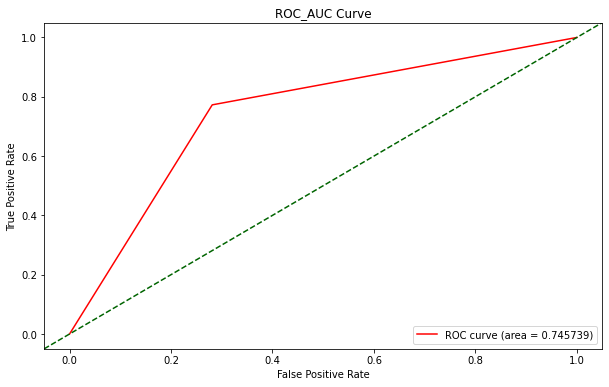

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
auc = roc_auc_score(y_test, dt_pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [25]:
#Logistic regression.
lr_model = LogisticRegression(random_state=25)

In [26]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=25)

In [27]:
pred = lr_model.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Logistic_regression_Accuracy = round(accuracy_score(y_test, pred)*100)
print(Logistic_regression_Accuracy)

[[22 10]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.80      0.89      0.84        44

    accuracy                           0.80        76
   macro avg       0.81      0.79      0.79        76
weighted avg       0.80      0.80      0.80        76

80


AUC: 0.7869318181818181


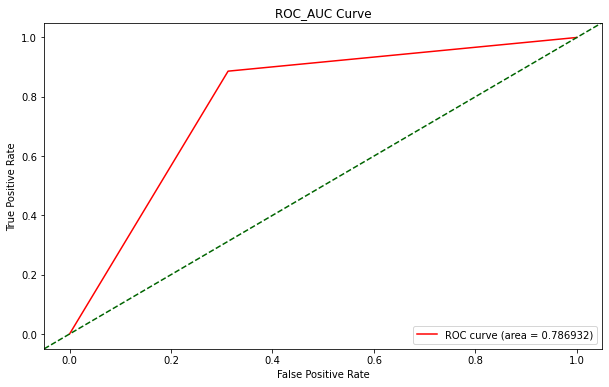

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knnr = KNeighborsClassifier() 
knnr.fit(X_train, y_train )
pred=knnr.predict(X_test)

In [31]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
KNN_Accuracy = round(accuracy_score(y_test, pred)*100)
print(KNN_Accuracy )

[[25  7]
 [ 8 36]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.84      0.82      0.83        44

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76

80


AUC: 0.7997159090909092


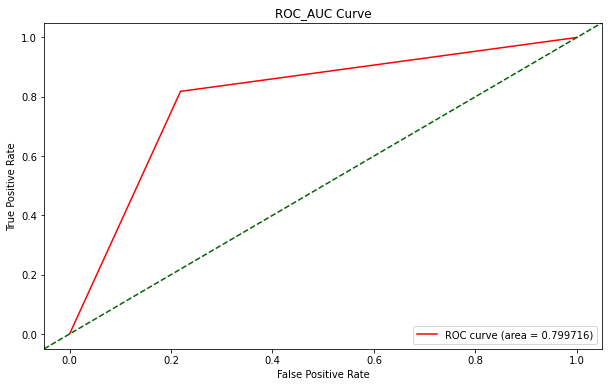

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [33]:
 clf = RandomForestClassifier(max_depth=2, random_state=0)

In [34]:
clf.fit(X_train, y_train)
RandomForestClassifier(...)
pred = clf.predict(X_test)
pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Random_Forest_Accuracy = round(accuracy_score(y_test, pred)*100)
print(Random_Forest_Accuracy)

[[20 12]
 [ 5 39]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.76      0.89      0.82        44

    accuracy                           0.78        76
   macro avg       0.78      0.76      0.76        76
weighted avg       0.78      0.78      0.77        76

78


AUC: 0.7556818181818181


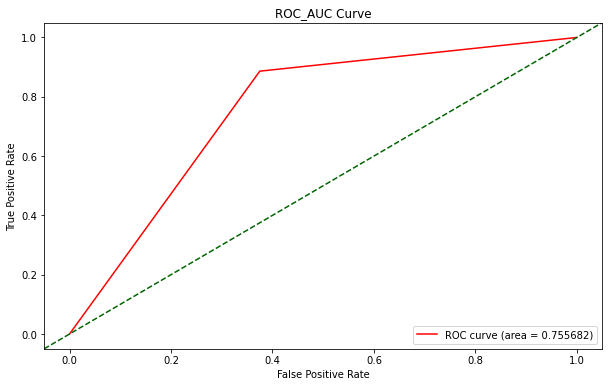

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

## Create a dataframe add names of all models as columns and their accuracy as rows and create a bar graph from it to visualize their accuracies.

In [43]:
data = {'Decision Tree Classifier': [Decision_Tree_Accuracy],
        'Logistic Regression': [Logistic_regression_Accuracy],
        'KNN': [KNN_Accuracy],
        'Random Forest Classifier': [Random_Forest_Accuracy]
        }

df = pd.DataFrame(data)
df

,Decision Tree Classifier,Logistic Regression,KNN,Random Forest Classifier
0,75,80,80,78


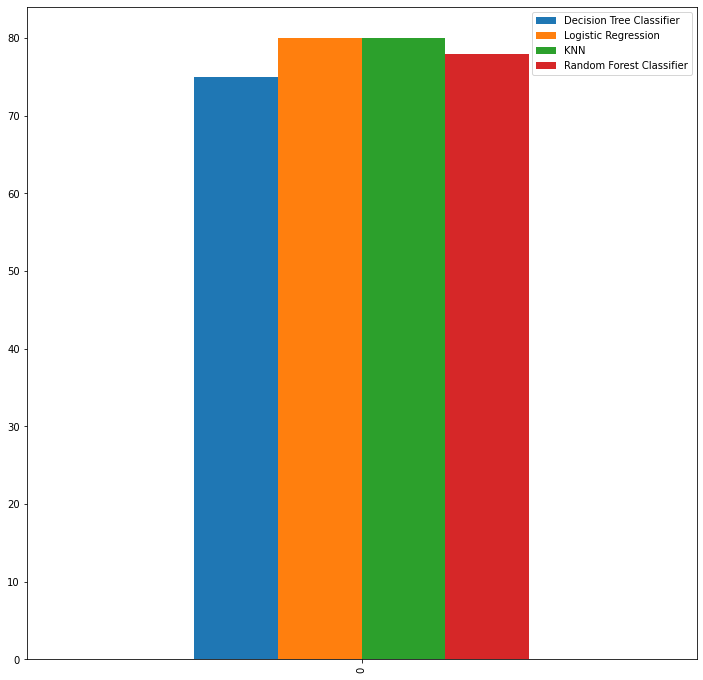

In [44]:
#Bar chart on the above dataframe.
df.plot.bar(figsize = (12, 12))
#plt.figure(figsize=(10, 8))
#plt.legend(x = ['Decision Tree Classifier', 'Logistic Regression', 'KNN', 'Random Forest Classifier'],loc=2)
#plt.legend(['Decision Tree Classifier', 'Logistic Regression', 'KNN','Random Forest Classifier'], loc = 'upper left')
plt.show()

In [45]:
dat = {'Models': ['Decision Tree Classifier', 'Logistic Regression',  'KNN', 'Random Forest Classifier'], 'Accuracy of Models': [Decision_Tree_Accuracy, Logistic_regression_Accuracy, KNN_Accuracy, Random_Forest_Accuracy]}
dt = pd.DataFrame(dat)
display(dt)

,Models,Accuracy of Models
0,Decision Tree Classifier,75
1,Logistic Regression,80
2,KNN,80
3,Random Forest Classifier,78


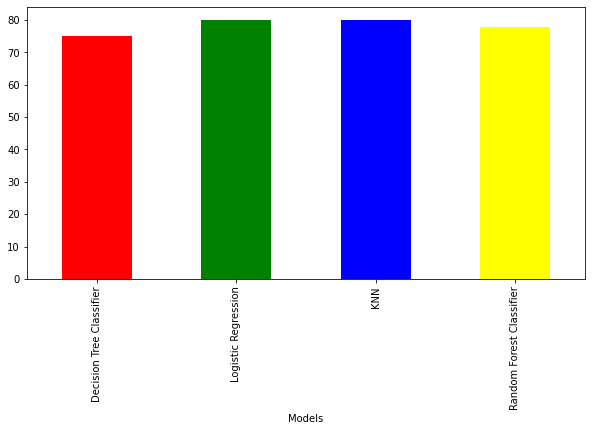

In [46]:
#Create barplot on the above dataframe.
dt.plot(x='Models', y='Accuracy of Models', kind='bar', color = ['red', 'green', 'blue', 'yellow'], figsize = (10, 5),legend=None)
#dt(plt.figure(figsize=(12,20)))
plt.show()

Good Luck!